<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_Integrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and Github

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import scipy.stats as stats

In [2]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 489, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 489 (delta 73), reused 11 (delta 11), pack-reused 373 (from 2)
Receiving objects: 100% (489/489), 53.60 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (230/230), done.


#Data Reading

In [3]:
df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_sla.csv')
display(df.head())
df.info()

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           1412 non-null   int64  
 1   Visit_ID             1412 non-null   int64  
 2   Date_of_birth        1412 non-null   object 
 3   Symptom_onset_date   1412 non-null   object 
 4   Diagnosis_date       1412 non-null   object 
 5   Sex                  1412 non-null   int64  
 6   Age_at_onset         1412 non-null   float64
 7   Clinical_onset_type  1412 non-null   object 
 8   Spirometry           1387 non-null   float64
 9   FVC                  1412 non-null   object 
 10  Ventilation          1412 non-null   float64
 11  Tracheostomy         1412 non-null   int64  
 12  PEG                  1412 non-null   float64
 13  Family_history       1412 non-null   float64
 14  Therapy              1412 non-null   object 
 15  Diagnostic_delay     1412 non-null   f

#Data Understanding

##Categorical

###Patient_ID

In [4]:
print(df['Patient_ID'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

###Visit_ID

In [5]:
visit_counts = df.groupby('Patient_ID')['Visit_ID'].count()
display(visit_counts)

,Visit_ID
Patient_ID,
1,9
2,9
3,5
4,8
5,1
...,...
250,3
251,4
252,2


###Clinical_onset_type

,count
Clinical_onset_type,
spinale,1113
bulbare,269
respiratorio,21
multiplo,9


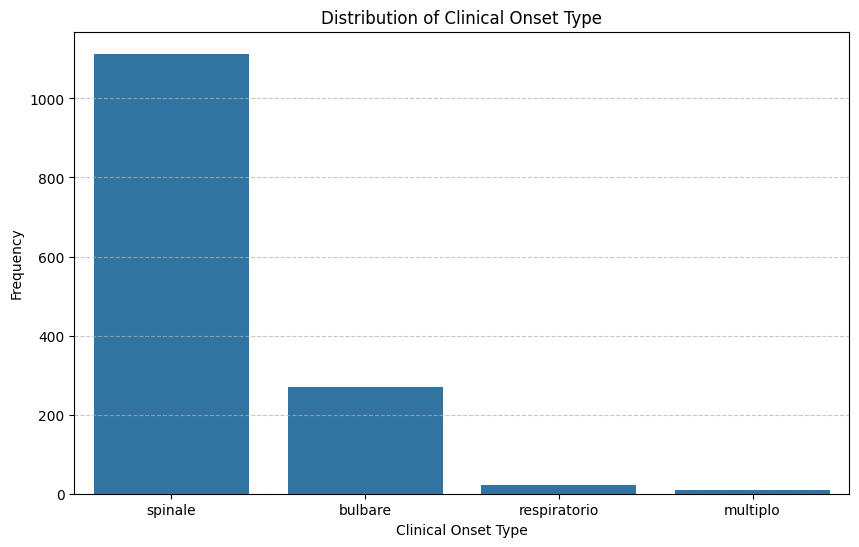

In [6]:
# Display the count of each unique value in Clinical_onset_type
display(df['Clinical_onset_type'].value_counts())

# Create a bar plot for Clinical_onset_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Clinical_onset_type', order=df['Clinical_onset_type'].value_counts().index)
plt.title('Distribution of Clinical Onset Type')
plt.xlabel('Clinical Onset Type')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Tracheostomy

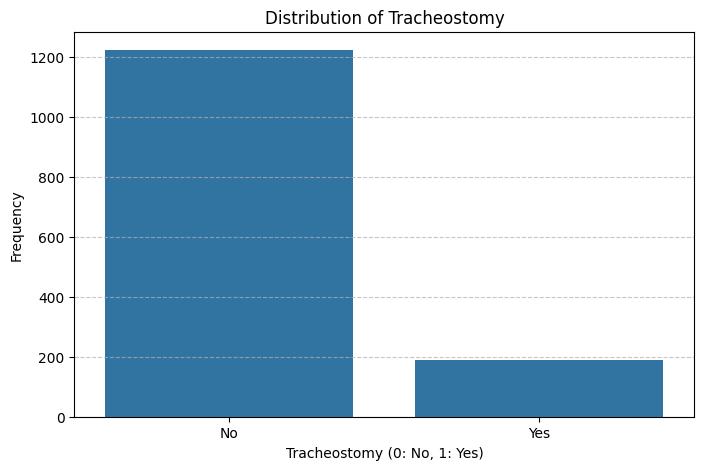

In [7]:
# Create a bar plot for Tracheostomy
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Tracheostomy')
plt.title('Distribution of Tracheostomy')
plt.xlabel('Tracheostomy (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Family_history

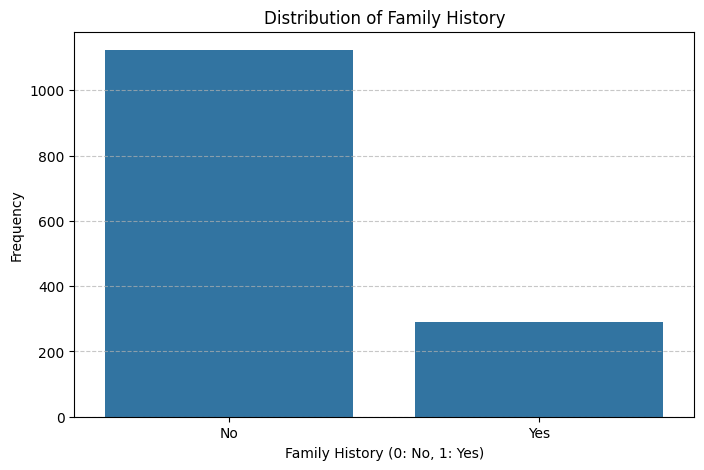

In [8]:
# Create a bar plot for Family_history
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Family_history')
plt.title('Distribution of Family History')
plt.xlabel('Family History (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Therapy

In [9]:
df["Therapy"].unique()

array(['Riluzolo', 'nessuna terapia', 'Edaravone', 'Riluzolo e Edaravone'],
      dtype=object)

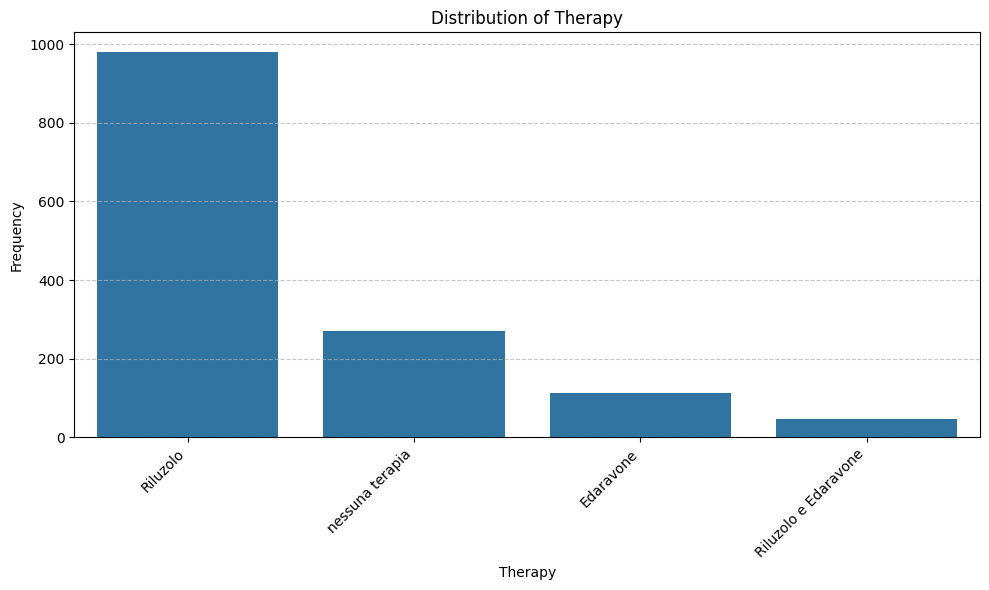

In [10]:
# Create a bar plot for Therapy
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Therapy', order=df['Therapy'].value_counts().index)
plt.title('Distribution of Therapy')
plt.xlabel('Therapy')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Ventilation

In [11]:
print(df['Ventilation'].unique())

[1. 0. 3. 2.]


In [12]:
# Transform values 2 and 3 in 'Ventilation' to 1
df['Ventilation'] = df['Ventilation'].replace({2: 1, 3: 1})

# Display the updated unique values to confirm the transformation
print(df['Ventilation'].unique())
df.head()

[1. 0.]


,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


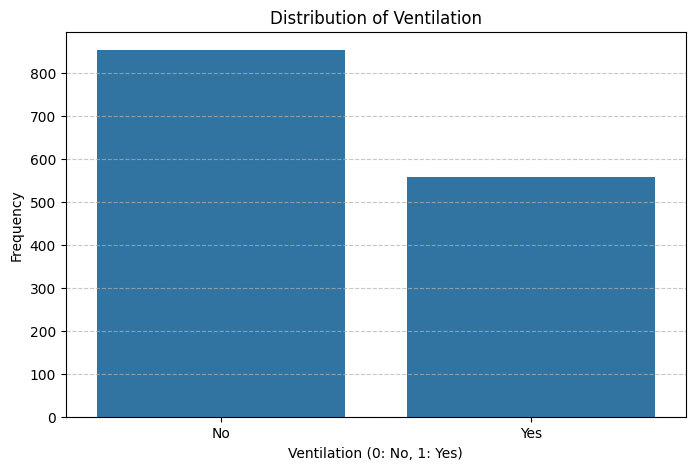

In [13]:
# Create a bar plot for Ventilation
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Ventilation')
plt.title('Distribution of Ventilation')
plt.xlabel('Ventilation (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Count the number of rows where 'Ventilation' is 0
ventilation_zero_count = df[df['Ventilation'] == 0].shape[0]
print(f"Number of patients with Ventilation = 0: {ventilation_zero_count}")

# Count the number of rows where 'Ventilation' is above 0
ventilation_above_zero_count = df[df['Ventilation'] > 0].shape[0]
print(f"Number of patients with Ventilation > 0: {ventilation_above_zero_count}")

Number of patients with Ventilation = 0: 854
Number of patients with Ventilation > 0: 558


###PEG

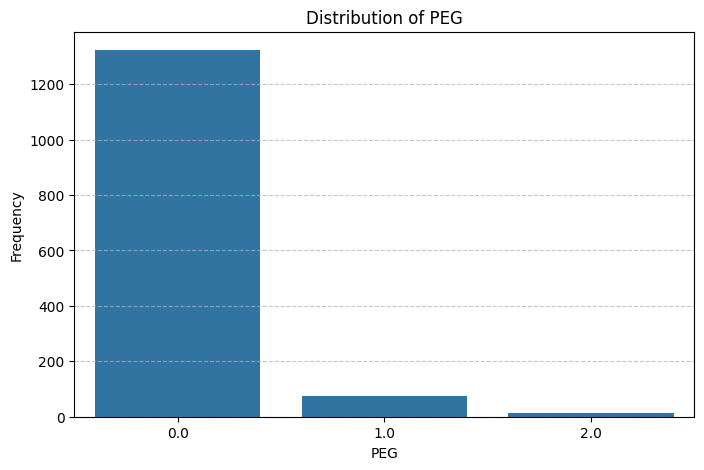

In [15]:
# Create a bar plot for PEG
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PEG')
plt.title('Distribution of PEG')
plt.xlabel('PEG')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

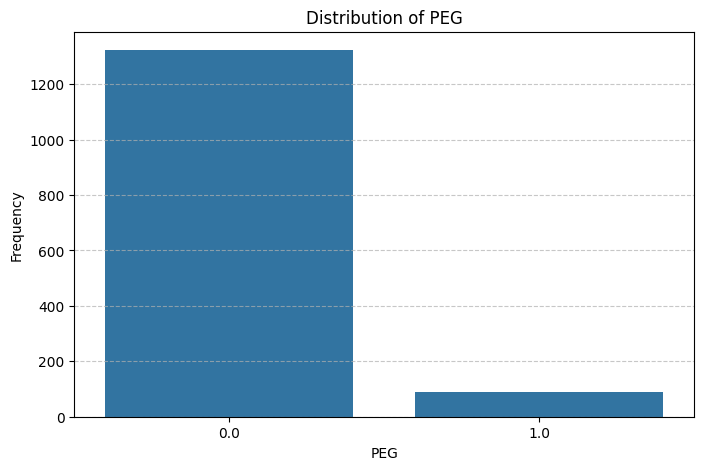

In [16]:
# change value 2 to 1
df['PEG'] = df['PEG'].replace({2: 1})

# Create a bar plot for PEG
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PEG')
plt.title('Distribution of PEG')
plt.xlabel('PEG')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



###KINGS_Total

In [17]:
print(df['KINGS_Total'].unique())

['3' '4B' '2' '4A' '1' '0']


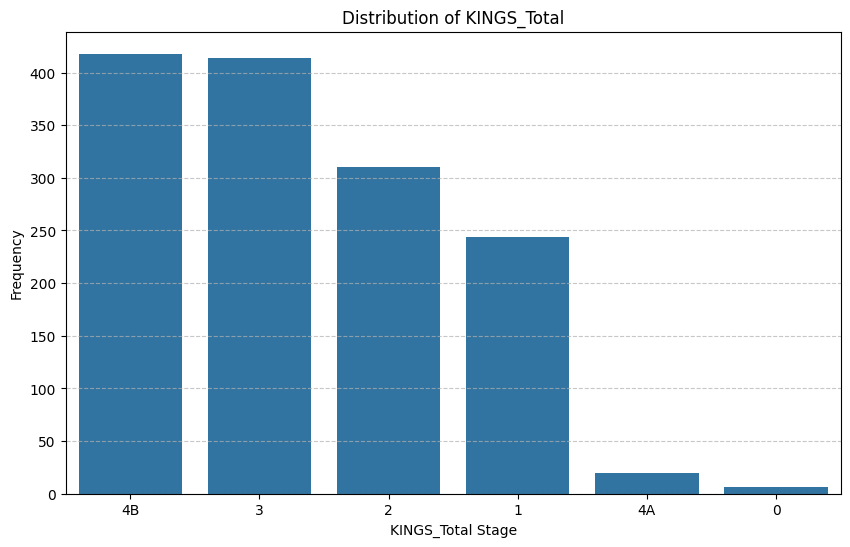

In [18]:
# Create a bar plot for KINGS_Total
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='KINGS_Total', order=df['KINGS_Total'].value_counts().index)
plt.title('Distribution of KINGS_Total')
plt.xlabel('KINGS_Total Stage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Numerical

###Age_at_onset

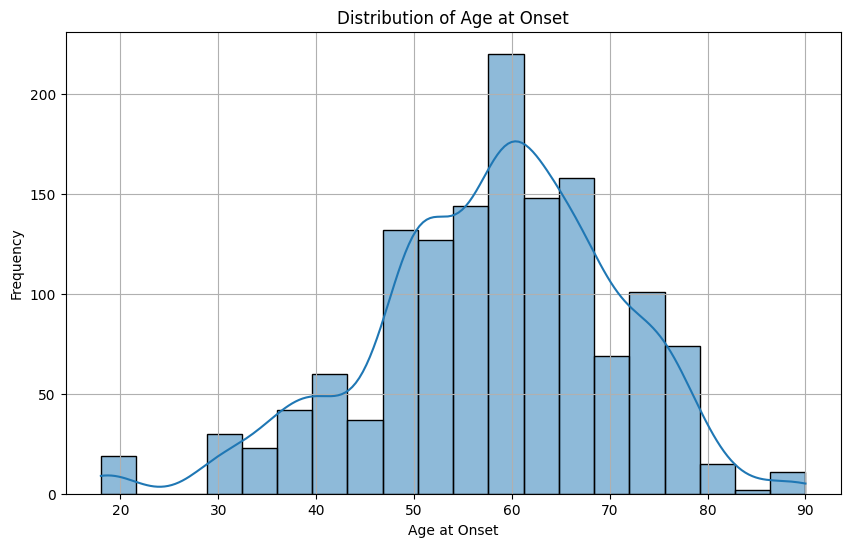

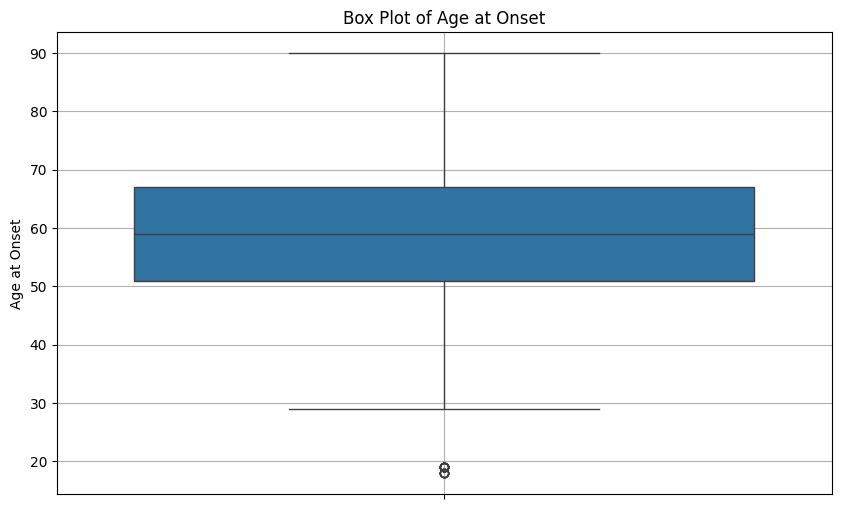

In [19]:
# Histogram for Age_at_onset
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age_at_onset', bins=20, kde=True)
plt.title('Distribution of Age at Onset')
plt.xlabel('Age at Onset')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for Age_at_onset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Age_at_onset')
plt.title('Box Plot of Age at Onset')
plt.ylabel('Age at Onset')
plt.grid(True)
plt.show()

###Diagnostic_delay

In [20]:
df['Diagnostic_delay'].describe()

,Diagnostic_delay
count,1412.000000
mean,17.800992
std,17.726065
min,1.000000
25%,8.000000
50%,12.500000
75%,22.000000
max,123.000000


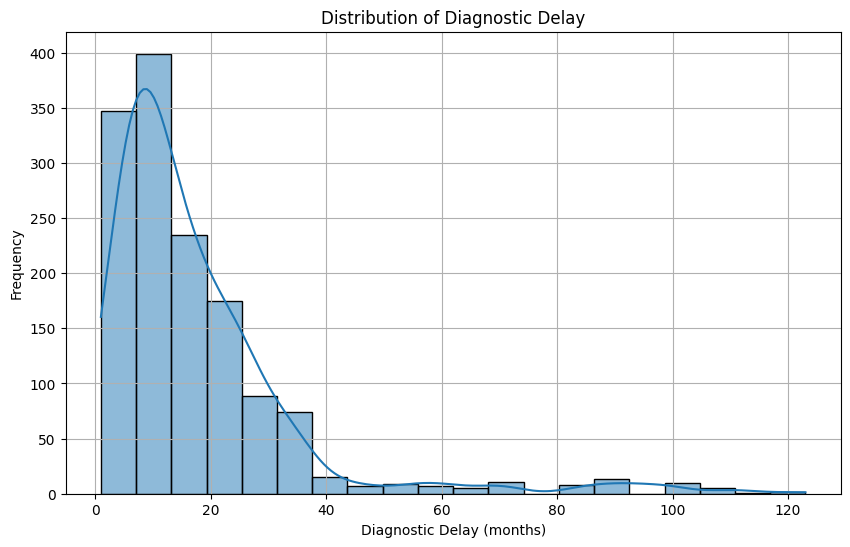

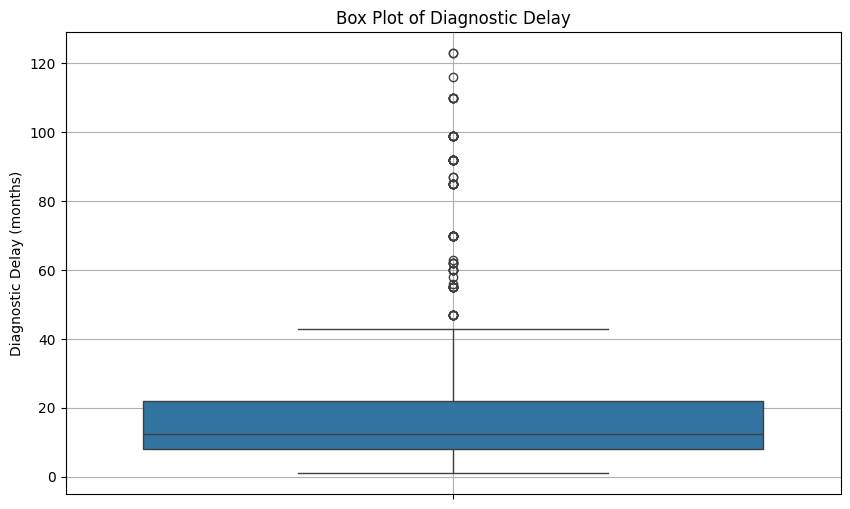

In [21]:
# Histogram for Diagnostic_delay
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Diagnostic_delay', bins=20, kde=True)
plt.title('Distribution of Diagnostic Delay')
plt.xlabel('Diagnostic Delay (months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for Diagnostic_delay
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Diagnostic_delay')
plt.title('Box Plot of Diagnostic Delay')
plt.ylabel('Diagnostic Delay (months)')
plt.grid(True)
plt.show()

###MRC_Upper_Limb

In [22]:
print(df['MRC_Upper_Limb'].unique())

[69. 63. 58. 46. 45. 49. 44.  0. 70. 68. 65. 43. 35. 34. 61. 56. 59. 55.
 38. 31. 16. 36. 62. 60. 29. 51. 40. 30. 27. 28. 18.  6. 50. 33. 64. 47.
 37. 26. 24.  8. 39. 67. 66. 54. 52. 32. 23. 20. 19. 42.  2. 57. 22. 48.
 41.  7. 10. 13. 11. 21. 53.  4. 25. 15. 14. 12.  9. 17.  5.  1.  3.]


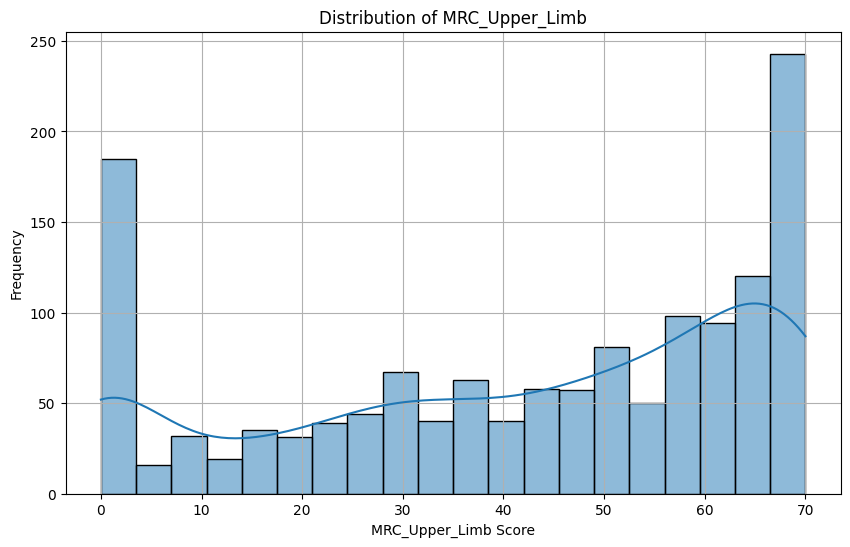

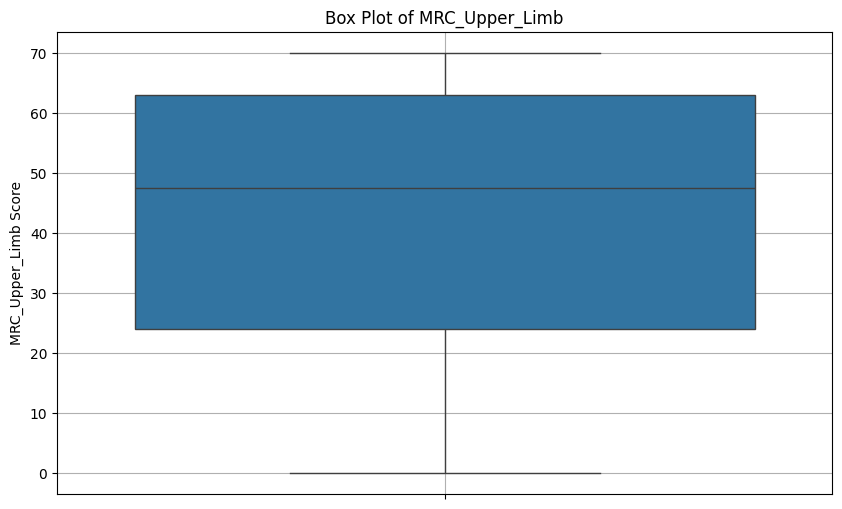

In [23]:
# Histogram for MRC_Upper_Limb
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MRC_Upper_Limb', bins=20, kde=True)
plt.title('Distribution of MRC_Upper_Limb')
plt.xlabel('MRC_Upper_Limb Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for MRC_Upper_Limb
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='MRC_Upper_Limb')
plt.title('Box Plot of MRC_Upper_Limb')
plt.ylabel('MRC_Upper_Limb Score')
plt.grid(True)
plt.show()

###MRC_Lower_Limb

In [24]:
df['MRC_Lower_Limb'].describe()

,MRC_Lower_Limb
count,1412.000000
mean,35.992210
std,20.712485
min,0.000000
25%,20.000000
50%,40.500000
75%,55.000000
max,60.000000


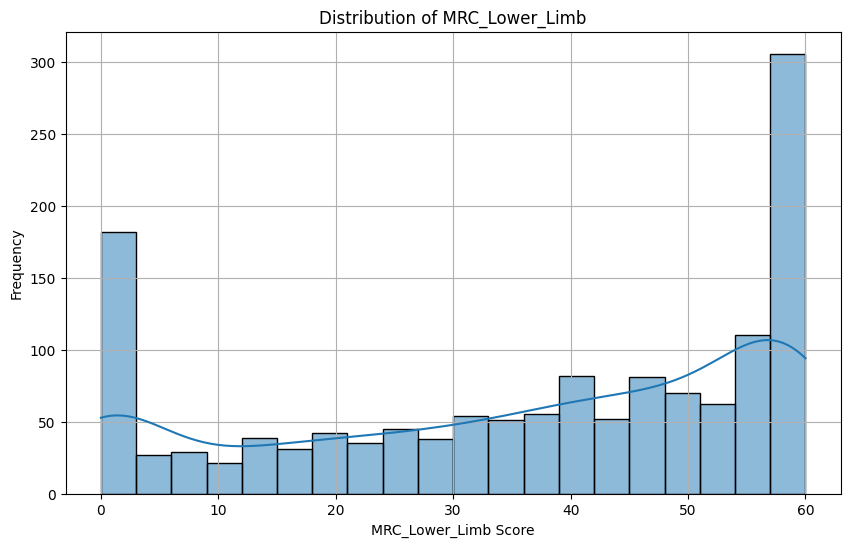

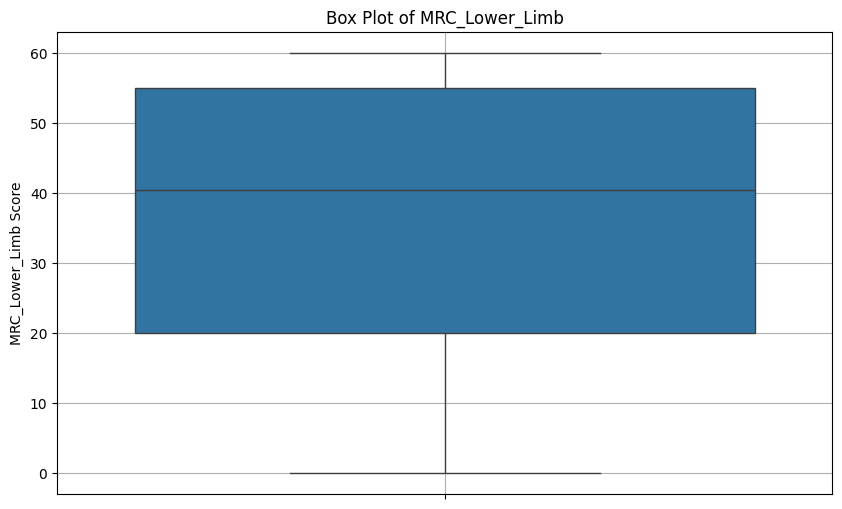

In [25]:
# Histogram for MRC_Lower_Limb
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MRC_Lower_Limb', bins=20, kde=True)
plt.title('Distribution of MRC_Lower_Limb')
plt.xlabel('MRC_Lower_Limb Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for MRC_Lower_Limb
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='MRC_Lower_Limb')
plt.title('Box Plot of MRC_Lower_Limb')
plt.ylabel('MRC_Lower_Limb Score')
plt.grid(True)
plt.show()

###MRC_Bulbar

In [26]:
df['MRC_Bulbar'].describe()

,MRC_Bulbar
count,1412.000000
mean,10.807365
std,4.615139
min,0.000000
25%,9.000000
50%,13.000000
75%,14.000000
max,15.000000


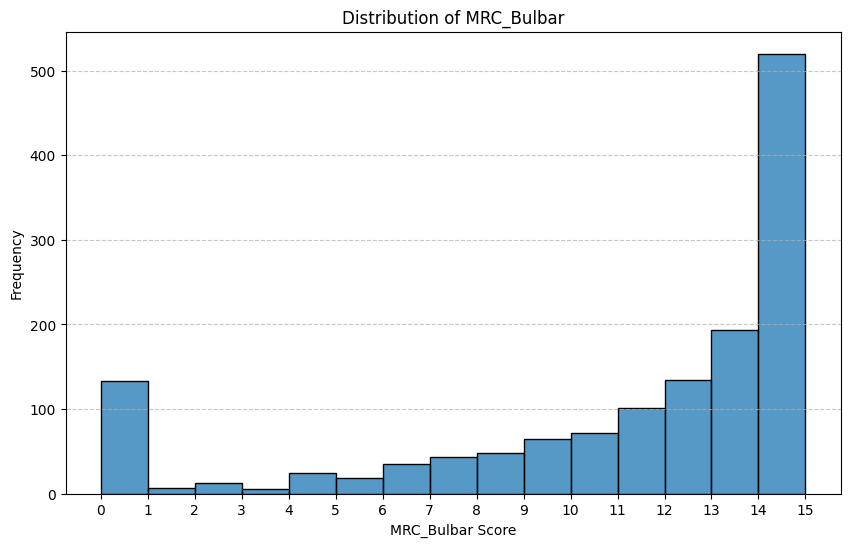

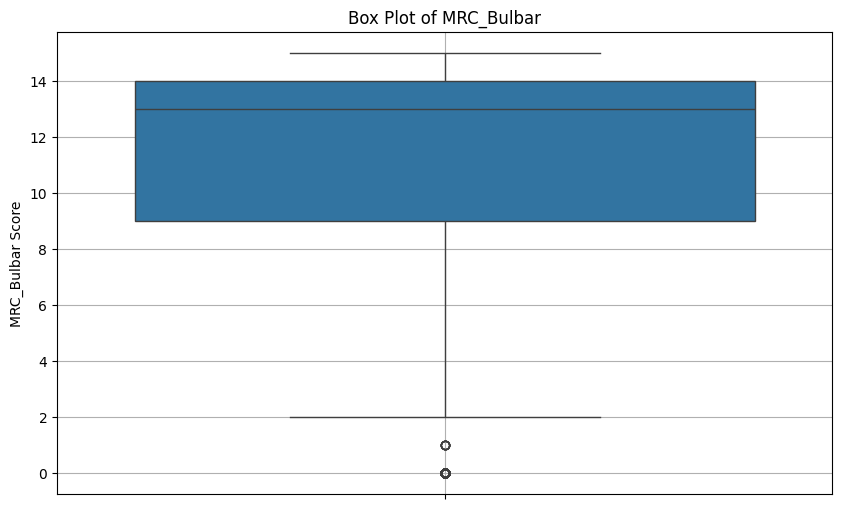

In [27]:
# Histogram for MRC_Bulbar
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MRC_Bulbar', bins=15, kde=False) # Bins based on unique values
plt.title('Distribution of MRC_Bulbar')
plt.xlabel('MRC_Bulbar Score')
plt.ylabel('Frequency')
plt.xticks(df['MRC_Bulbar'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Box plot for MRC_Bulbar
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='MRC_Bulbar')
plt.title('Box Plot of MRC_Bulbar')
plt.ylabel('MRC_Bulbar Score')
plt.grid(True)
plt.show()

###PUMNS_Upper_Limb

In [28]:
df['PUMNS_Upper_Limb'].describe()

,PUMNS_Upper_Limb
count,1412.000000
mean,4.542493
std,3.758143
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,14.000000


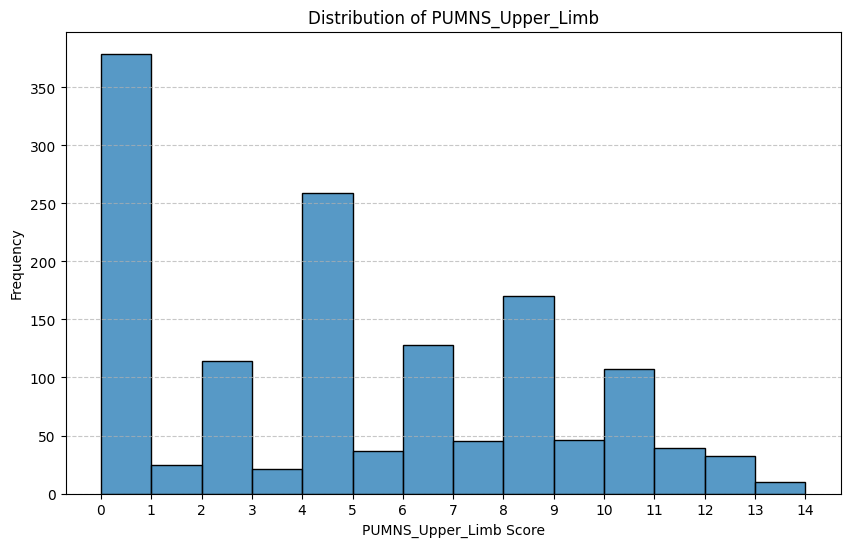

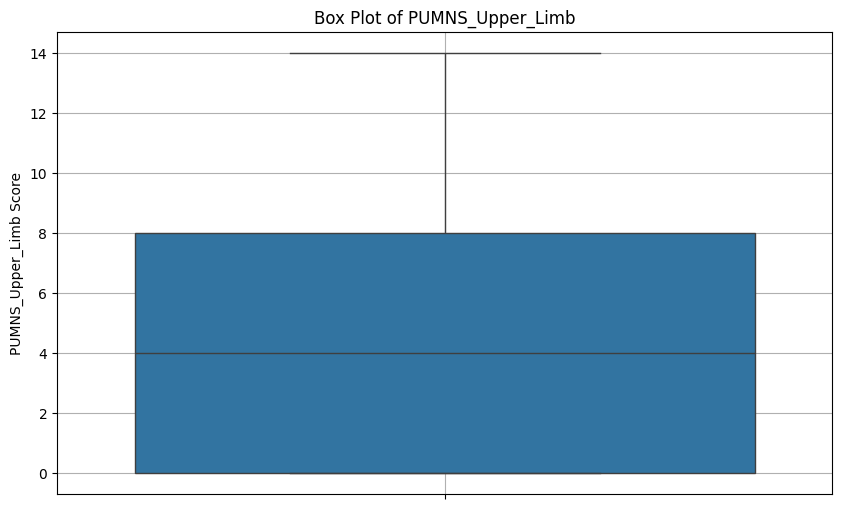

In [29]:
# Histogram for PUMNS_Upper_Limb
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PUMNS_Upper_Limb', bins=14, kde=False) # Bins based on unique values
plt.title('Distribution of PUMNS_Upper_Limb')
plt.xlabel('PUMNS_Upper_Limb Score')
plt.ylabel('Frequency')
plt.xticks(df['PUMNS_Upper_Limb'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box plot for PUMNS_Upper_Limb
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PUMNS_Upper_Limb')
plt.title('Box Plot of PUMNS_Upper_Limb')
plt.ylabel('PUMNS_Upper_Limb Score')
plt.grid(True)
plt.show()

###PUMNS_Lower_Limb

In [30]:
df['PUMNS_Lower_Limb'].describe()

,PUMNS_Lower_Limb
count,1412.000000
mean,5.708924
std,4.002778
min,0.000000
25%,2.000000
50%,6.000000
75%,8.000000
max,14.000000


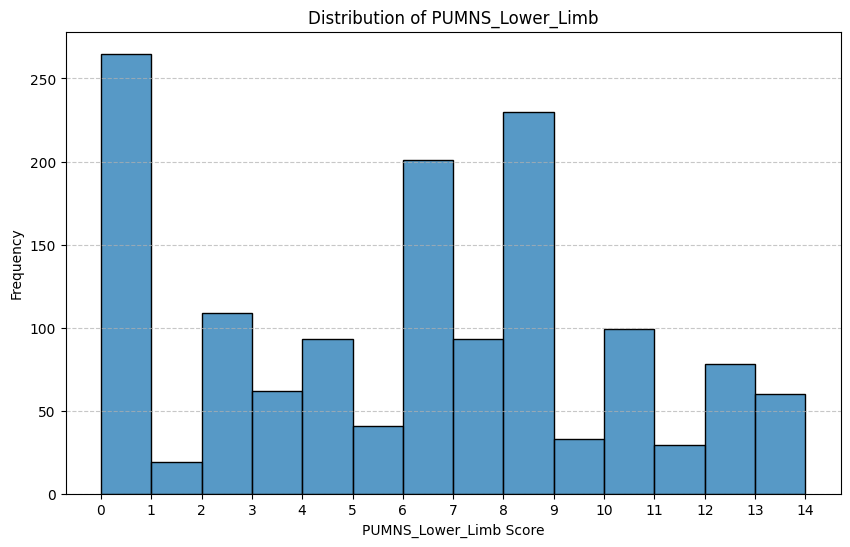

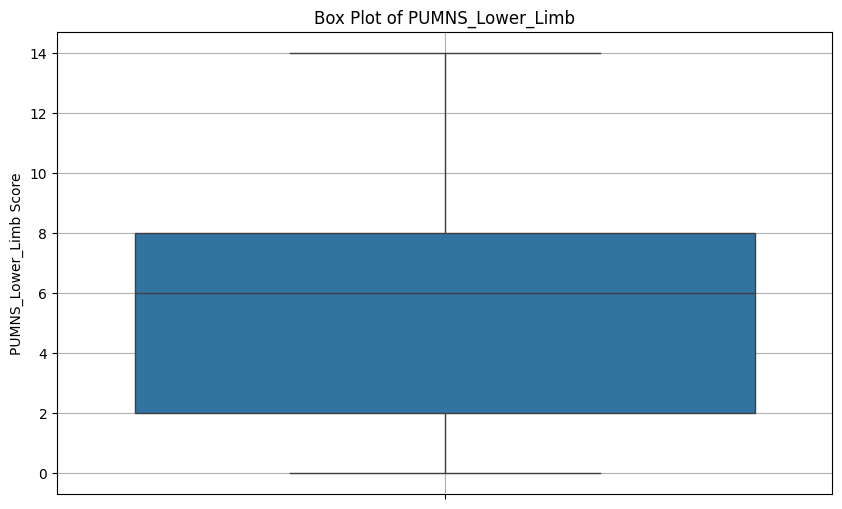

In [31]:
# Histogram for PUMNS_Lower_Limb
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PUMNS_Lower_Limb', bins=14, kde=False) # Bins based on unique values
plt.title('Distribution of PUMNS_Lower_Limb')
plt.xlabel('PUMNS_Lower_Limb Score')
plt.ylabel('Frequency')
plt.xticks(df['PUMNS_Lower_Limb'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box plot for PUMNS_Lower_Limb
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PUMNS_Lower_Limb')
plt.title('Box Plot of PUMNS_Lower_Limb')
plt.ylabel('PUMNS_Lower_Limb Score')
plt.grid(True)
plt.show()

###PUMNS_Bulbar

In [32]:
df['PUMNS_Bulbar'].describe()

,PUMNS_Bulbar
count,1412.000000
mean,1.425637
std,1.312101
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


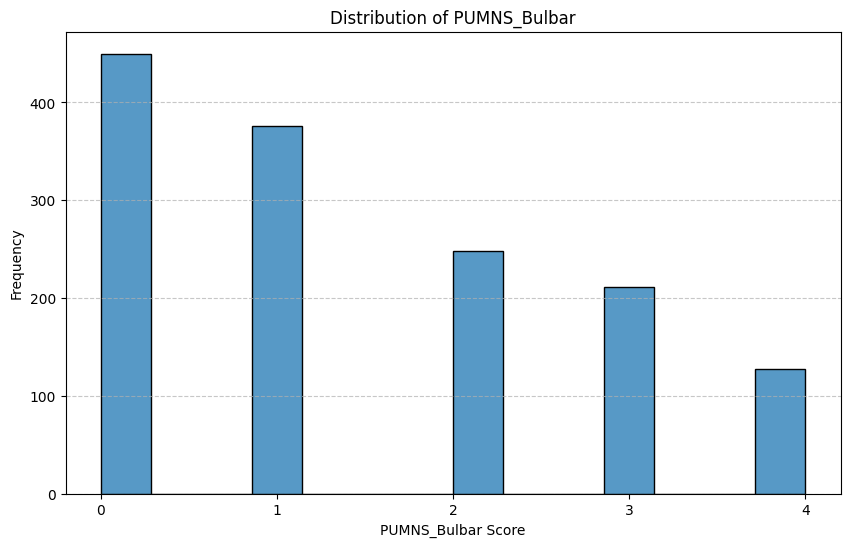

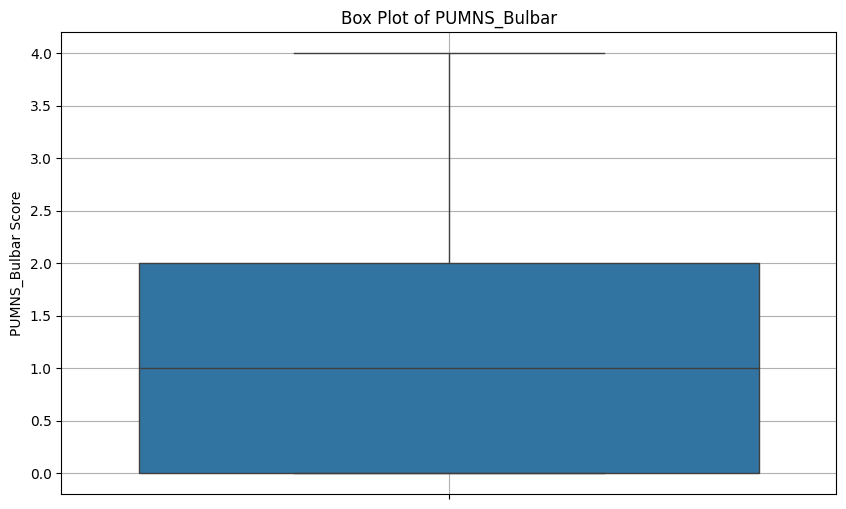

In [33]:
# Histogram for PUMNS_Bulbar
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PUMNS_Bulbar', bins=14, kde=False) # Bins based on unique values
plt.title('Distribution of PUMNS_Bulbar')
plt.xlabel('PUMNS_Bulbar Score')
plt.ylabel('Frequency')
plt.xticks(df['PUMNS_Bulbar'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box plot for PUMNS_Bulbar
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PUMNS_Bulbar')
plt.title('Box Plot of PUMNS_Bulbar')
plt.ylabel('PUMNS_Bulbar Score')
plt.grid(True)
plt.show()

###CNS_Linear_Score

In [34]:
df['CNS_Linear_Score'].describe()

,CNS_Linear_Score
count,1412.000000
mean,10.682011
std,7.185811
min,0.000000
25%,7.000000
50%,7.000000
75%,13.000000
max,35.000000


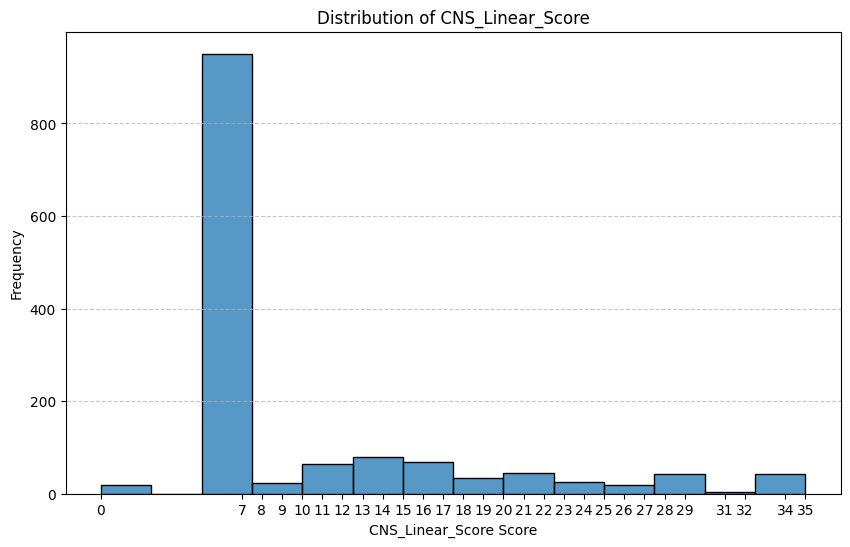

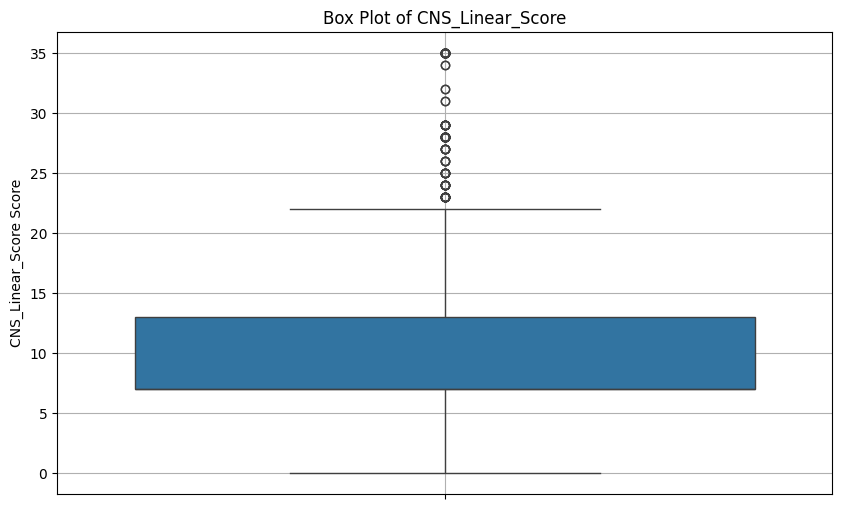

In [35]:
# Histogram for CNS_Linear_Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CNS_Linear_Score', bins=14, kde=False) # Bins based on unique values
plt.title('Distribution of CNS_Linear_Score')
plt.xlabel('CNS_Linear_Score Score')
plt.ylabel('Frequency')
plt.xticks(df['CNS_Linear_Score'].unique()) # Set ticks at unique values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Box plot for CNS_Linear_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='CNS_Linear_Score')
plt.title('Box Plot of CNS_Linear_Score')
plt.ylabel('CNS_Linear_Score Score')
plt.grid(True)
plt.show()

###Disease_duration

In [36]:
df['Disease_duration'].describe()

,Disease_duration
count,1412.000000
mean,38.847734
std,33.350110
min,2.000000
25%,17.000000
50%,29.000000
75%,49.000000
max,235.000000


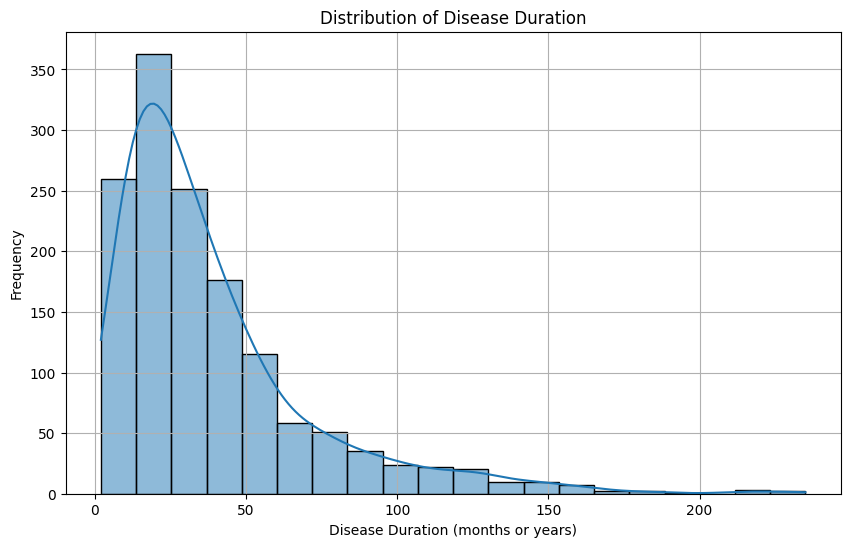

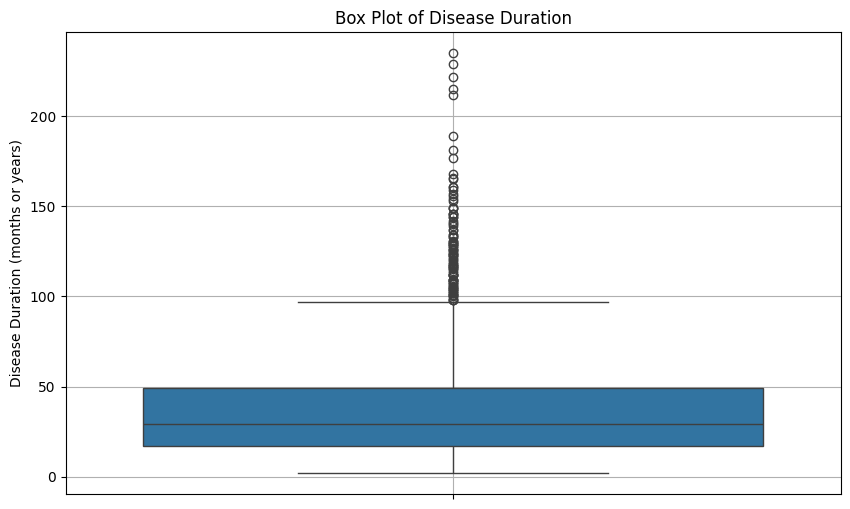

In [37]:
# Histogram for Disease_duration
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Disease_duration', bins=20, kde=True)
plt.title('Distribution of Disease Duration')
plt.xlabel('Disease Duration (months or years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for Disease_duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Disease_duration')
plt.title('Box Plot of Disease Duration')
plt.ylabel('Disease Duration (months or years)')
plt.grid(True)
plt.show()

###Progression_rate

In [38]:
df['Progression_rate'].describe()

,Progression_rate
count,1412.000000
mean,0.783689
std,0.841731
min,0.000000
25%,0.293897
50%,0.543168
75%,0.983333
max,11.333333


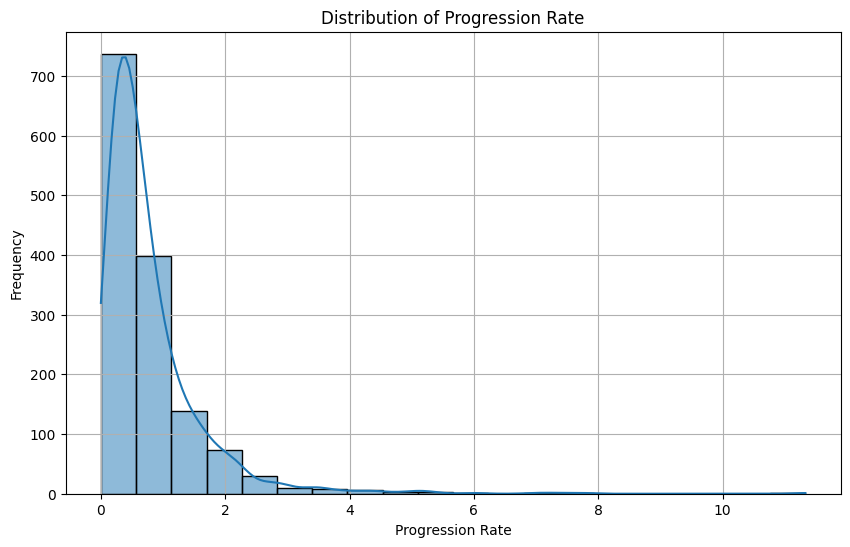

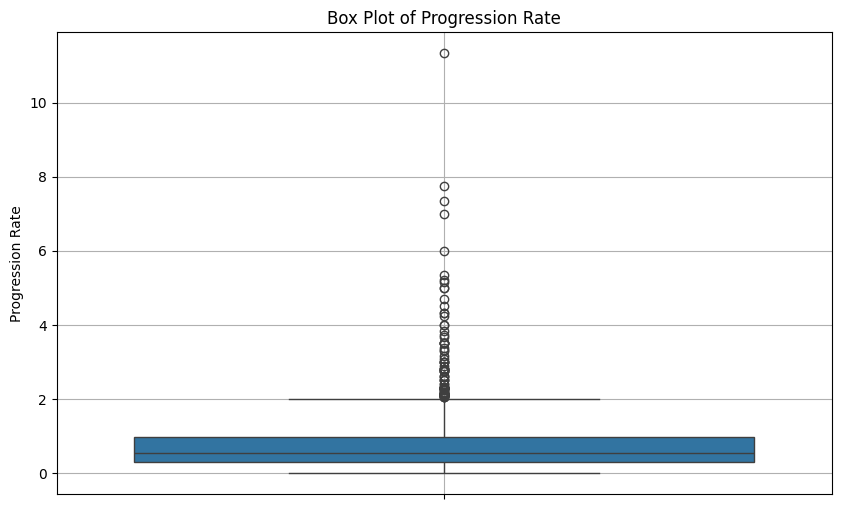

In [39]:
# Histogram for Progression_rate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Progression_rate', bins=20, kde=True)
plt.title('Distribution of Progression Rate')
plt.xlabel('Progression Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for Progression_rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Progression_rate')
plt.title('Box Plot of Progression Rate')
plt.ylabel('Progression Rate')
plt.grid(True)
plt.show()

###ALSFRS_R

In [40]:
df['ALSFRS_R'].describe()

,ALSFRS_R
count,1412.000000
mean,29.804533
std,10.958528
min,0.000000
25%,23.000000
50%,32.000000
75%,38.000000
max,48.000000


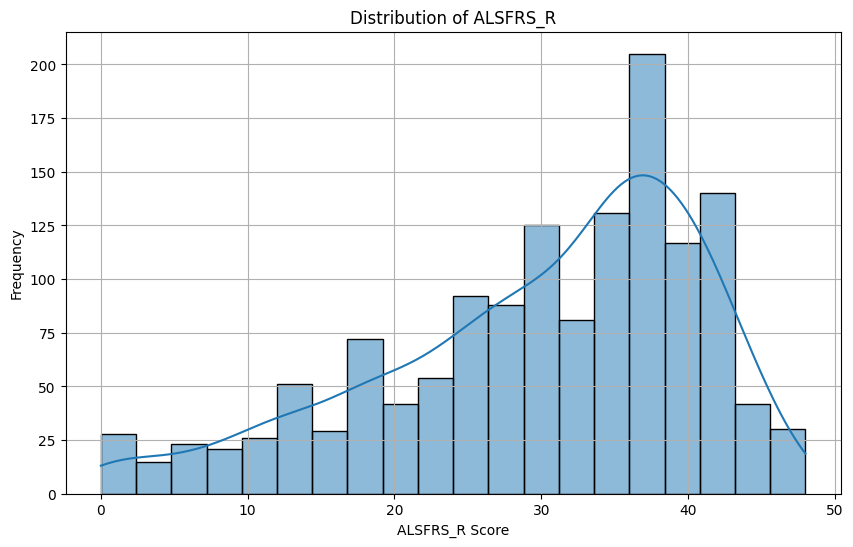

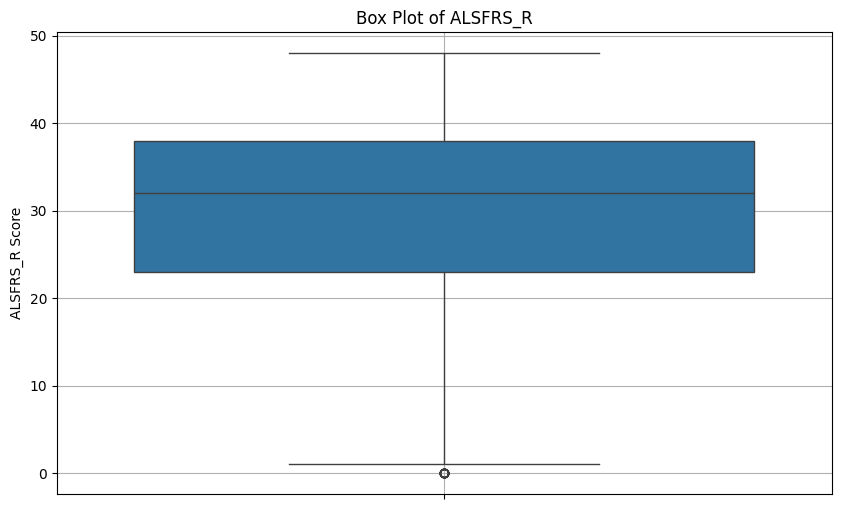

In [41]:
# Histogram for ALSFRS_R
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ALSFRS_R', bins=20, kde=True)
plt.title('Distribution of ALSFRS_R')
plt.xlabel('ALSFRS_R Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for ALSFRS_R
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='ALSFRS_R')
plt.title('Box Plot of ALSFRS_R')
plt.ylabel('ALSFRS_R Score')
plt.grid(True)
plt.show()

###ALSAQ_5

In [42]:
df['ALSAQ_5'].describe()

,ALSAQ_5
count,1412.000000
mean,47.163598
std,25.502257
min,0.000000
25%,30.000000
50%,45.000000
75%,65.000000
max,100.000000


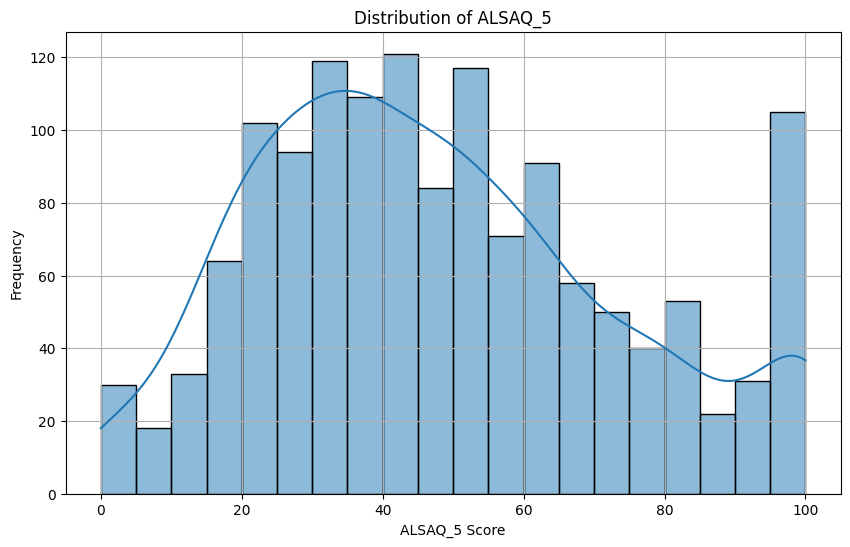

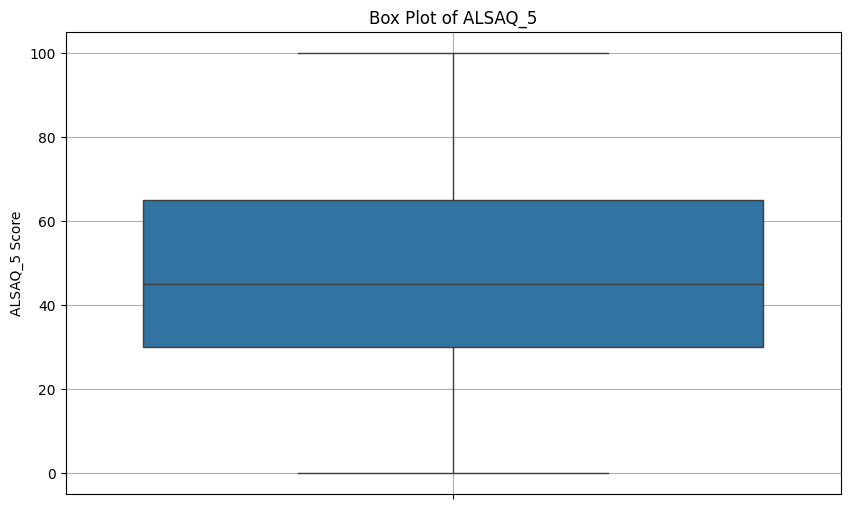

In [43]:
# Histogram for ALSAQ_5
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ALSAQ_5', bins=20, kde=True)
plt.title('Distribution of ALSAQ_5')
plt.xlabel('ALSAQ_5 Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot for ALSAQ_5
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='ALSAQ_5')
plt.title('Box Plot of ALSAQ_5')
plt.ylabel('ALSAQ_5 Score')
plt.grid(True)
plt.show()

#Null Values Handling

##FVC

In [44]:
fvc_greater_than_80 = df[df['FVC'] == '>80']
fvc_60_to_80 = df[df['FVC'] == '60-80']
fvc_40_to_60 = df[df['FVC'] == '40-60']
fvc_less_than_40 = df[df['FVC'] == '<40']

In [45]:
# Create a new column for FVC categories in the main dataframe, excluding 'ND'
df['FVC_Category'] = pd.Categorical(df['FVC'].replace('ND', pd.NA), categories=['<40', '40-60', '60-80', '>80'], ordered=True)

# Display value counts for the new FVC_Category column
display(df['FVC_Category'].value_counts(dropna=False))

,count
FVC_Category,
>80,591
NaN,288
60-80,229
40-60,179
<40,125


In [46]:
display(df.groupby('FVC_Category')['ALSFRS_R'].describe())

/tmp/ipython-input-4158202987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('FVC_Category')['ALSFRS_R'].describe())


,count,mean,std,min,25%,50%,75%,max
FVC_Category,,,,,,,,
<40,125.0,21.592000,7.680197,0.0,17.0,21.0,26.0,43.0
40-60,179.0,27.234637,7.574404,4.0,22.0,28.0,32.0,43.0
60-80,229.0,31.004367,7.463653,8.0,27.0,32.0,36.0,45.0
>80,591.0,36.573604,6.061625,12.0,33.5,37.0,41.0,48.0


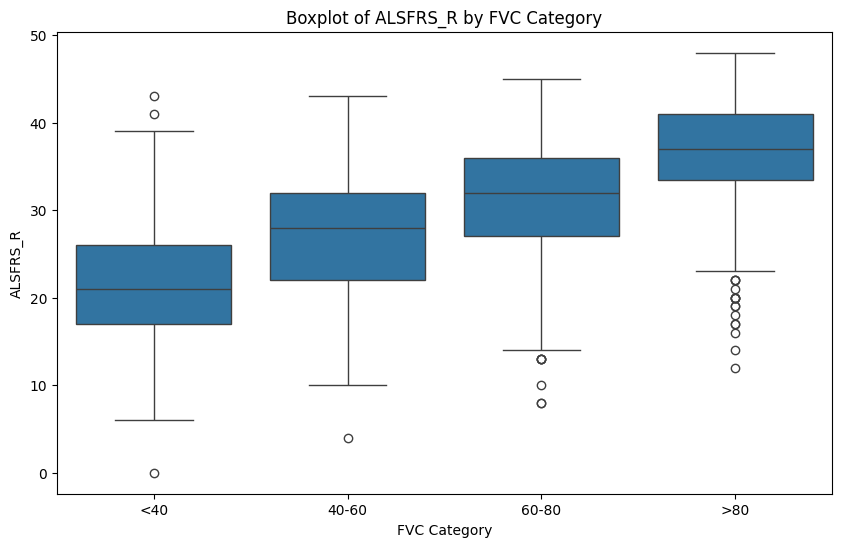

In [47]:
# Create a new column for FVC categories for plotting
df['FVC_Category'] = pd.Categorical(df['FVC'], categories=['<40', '40-60', '60-80', '>80'], ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC_Category', y='ALSFRS_R')
plt.title('Boxplot of ALSFRS_R by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('ALSFRS_R')
plt.show()

In [48]:
# Calculate the mean of 'ALSFRS_R' for each FVC category (excluding 'ND')
fvc_category_means = df.groupby('FVC_Category')['ALSFRS_R'].mean()

# Display the calculated means
display(fvc_category_means)

/tmp/ipython-input-3663909878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fvc_category_means = df.groupby('FVC_Category')['ALSFRS_R'].mean()


,ALSFRS_R
FVC_Category,
<40,21.592000
40-60,27.234637
60-80,31.004367
>80,36.573604


In [49]:
# Identify rows where FVC is 'ND'
nd_fvc_rows = df[df['FVC'] == 'ND']

# Display the first few rows with 'ND' in FVC
display(nd_fvc_rows.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5,FVC_Category
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0,NaN
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0,NaN
8,1,9,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,55.0,0.854545,1.0,35.0,NaN
21,3,4,1946-01-03,2020-12-01,2021-12-10,0,75.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,22.0,1.590909,13.0,80.0,NaN
22,3,5,1946-01-03,2020-12-01,2021-12-10,0,75.0,spinale,0.0,ND,...,0.0,0.0,0.0,7.0,4B,41.0,0.902439,11.0,85.0,NaN


In [50]:
import numpy as np

# Create a dictionary of the mean ALSFRS_R for each FVC category
mean_alsfrs_r_by_fvc = df.groupby('FVC_Category')['ALSFRS_R'].mean().to_dict()

# Remove the NaN category from the dictionary if it exists
if np.nan in mean_alsfrs_r_by_fvc:
    del mean_alsfrs_r_by_fvc[np.nan]

# Define a function to find the nearest FVC category based on ALSFRS_R
def find_nearest_fvc_category(alsfrs_r_value, means_dict):
    if pd.isna(alsfrs_r_value):
        return np.nan  # Cannot impute if ALSFRS_R is also NaN
    distances = {category: abs(alsfrs_r_value - mean_val) for category, mean_val in means_dict.items()}
    return min(distances, key=distances.get)

# Apply the function to the rows where FVC is 'ND' to get the imputed category
imputed_categories = nd_fvc_rows['ALSFRS_R'].apply(lambda x: find_nearest_fvc_category(x, mean_alsfrs_r_by_fvc))

# Update the 'FVC' column in the original DataFrame with the imputed values
df.loc[nd_fvc_rows.index, 'FVC'] = imputed_categories

# Update the 'FVC_Category' column based on the updated 'FVC' column
df['FVC_Category'] = pd.Categorical(df['FVC'].replace('ND', pd.NA), categories=['<40', '40-60', '60-80', '>80'], ordered=True)

# Display value counts for the FVC_Category column to verify imputation
display(df['FVC_Category'].value_counts(dropna=False))

/tmp/ipython-input-4190061216.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_alsfrs_r_by_fvc = df.groupby('FVC_Category')['ALSFRS_R'].mean().to_dict()


,count
FVC_Category,
>80,664
<40,311
60-80,243
40-60,194


In [51]:
# Replace the original 'FVC' column with the imputed 'FVC_Category'
df['FVC'] = df['FVC_Category']

# Drop the 'FVC_Category' column
df = df.drop('FVC_Category', axis=1)

# Display the first few rows to confirm the changes
display(df.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,>80,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,40-60,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


In [52]:
# Check for remaining 'ND' values in the 'FVC' column
remaining_nd_fvc = df[df['FVC'] == 'ND']

# Display the rows with remaining 'ND' in FVC
display(remaining_nd_fvc)

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5


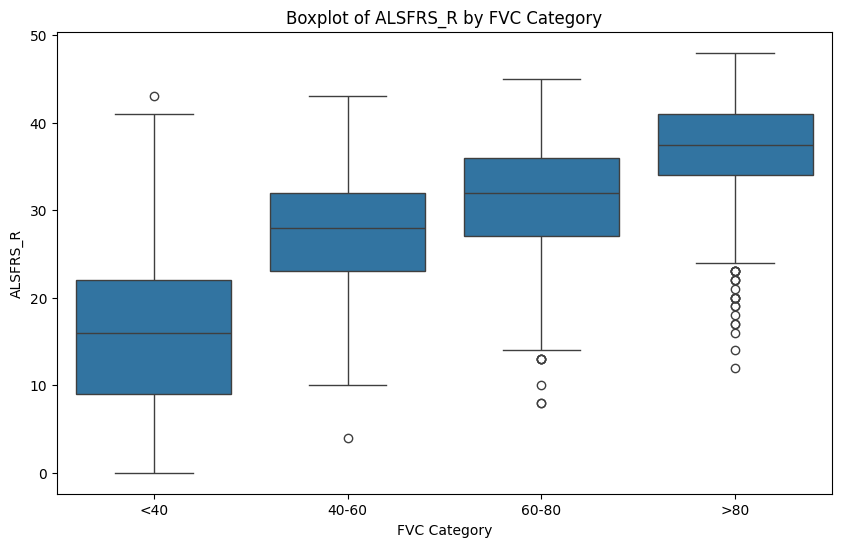

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC', y='ALSFRS_R', order=['<40', '40-60', '60-80', '>80'])
plt.title('Boxplot of ALSFRS_R by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('ALSFRS_R')
plt.show()

##Spirometry

In [54]:
# Filter the DataFrame for rows where 'Spirometry' is NaN
spirometry_nan_rows = df[df['Spirometry'].isna()]

# Display the 'FVC' column for these rows
display(spirometry_nan_rows['FVC'])

,FVC
2,>80
4,40-60
36,<40
108,>80
165,>80
201,<40
265,>80
295,>80
297,60-80
326,60-80


In [55]:
# Filter the DataFrame for rows where FVC is '>80'
fvc_greater_than_80_df = df[df['FVC'] == '>80']
spirometry_counts = fvc_greater_than_80_df['Spirometry'].value_counts(dropna=False)
print("Spirometry counts for FVC >80:")
print(spirometry_counts)

# Filter the DataFrame for rows where FVC is '60-80'
fvc_60_80_df = df[df['FVC'] == '60-80']
spirometry_counts = fvc_60_80_df['Spirometry'].value_counts(dropna=False)
print("\nSpirometry counts for FVC 60-80:")
print(spirometry_counts)

# Filter the DataFrame for rows where FVC is '40-60'
fvc_40_60_df = df[df['FVC'] == '40-60']
spirometry_counts = fvc_40_60_df['Spirometry'].value_counts(dropna=False)
print("\nSpirometry counts for FVC 40-60:")
print(spirometry_counts)


# Filter the DataFrame for rows where FVC is '<40'
fvc_less_than_40_df = df[df['FVC'] == '<40']
spirometry_counts = fvc_less_than_40_df['Spirometry'].value_counts(dropna=False)
print("\nSpirometry counts for FVC <40:")
print(spirometry_counts)

Spirometry counts for FVC >80:
Spirometry
1.0    591
0.0     61
NaN     12
Name: count, dtype: int64

Spirometry counts for FVC 60-80:
Spirometry
1.0    229
0.0     11
NaN      3
Name: count, dtype: int64

Spirometry counts for FVC 40-60:
Spirometry
1.0    179
0.0     13
NaN      2
Name: count, dtype: int64

Spirometry counts for FVC <40:
Spirometry
0.0    178
1.0    125
NaN      8
Name: count, dtype: int64


In [56]:
# Impute NaN values in 'Spirometry' based on 'FVC' categories
df.loc[df['FVC'].isin(['>80', '60-80', '40-60']) & df['Spirometry'].isna(), 'Spirometry'] = 1.0
df.loc[(df['FVC'] == '<40') & df['Spirometry'].isna(), 'Spirometry'] = 0.0

# Display the value counts for 'Spirometry' including NaN to check
display(df['Spirometry'].value_counts(dropna=False))

,count
Spirometry,
1.0,1141
0.0,271


In [57]:
display(df.isnull().sum())

,0
Patient_ID,0
Visit_ID,0
Date_of_birth,0
Symptom_onset_date,0
Diagnosis_date,0
Sex,0
Age_at_onset,0
Clinical_onset_type,0
Spirometry,0
FVC,0


#Target Variable Analysis

##Target Treatment Decision

In [58]:
df['KINGS_Total'] = df['KINGS_Total'].replace({'0': '1', '4A': '4B'})
df['KINGS_Total'] = df['KINGS_Total'].replace({'4B': '4'})
display(df['KINGS_Total'].value_counts())

,count
KINGS_Total,
4,438
3,414
2,310
1,250


##Target–Feature Relationship Analysis

###Categorical

####Clinical_onset_type

In [59]:
# Create a contingency table of 'Clinical_onset_type' and 'KINGS_Total'
contingency_table_onset = pd.crosstab(df['Clinical_onset_type'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_onset, p_onset, dof_onset, expected_onset = chi2_contingency(contingency_table_onset)

# Print the results
print(f"Chi-squared statistic (Clinical Onset Type vs KINGS_Total): {chi2_onset}")
print(f"P-value (Clinical Onset Type vs KINGS_Total): {p_onset:.30f}")
print(f"Degrees of freedom (Clinical Onset Type vs KINGS_Total): {dof_onset}")
print("Expected frequencies (Clinical Onset Type vs KINGS_Total):")
display(expected_onset)

Chi-squared statistic (Clinical Onset Type vs KINGS_Total): 44.55518319466093
P-value (Clinical Onset Type vs KINGS_Total): 0.000001114934283410840272190078
Degrees of freedom (Clinical Onset Type vs KINGS_Total): 9
Expected frequencies (Clinical Onset Type vs KINGS_Total):


array([[ 47.62747875,  59.05807365,  78.87110482,  83.44334278],
       [  1.59348442,   1.97592068,   2.6388102 ,   2.7917847 ],
       [  3.71813031,   4.61048159,   6.1572238 ,   6.51416431],
       [197.06090652, 244.35552408, 326.33286119, 345.25070822]])

####Tracheostomy

In [60]:
# Create a contingency table of 'Tracheostomy' and 'KINGS_Total'
contingency_table = pd.crosstab(df['Tracheostomy'], df['KINGS_Total'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p:.30f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
display(expected)

Chi-squared statistic: 104.1065895907723
P-value: 0.000000000000000000000203391876
Degrees of freedom: 3
Expected frequencies:


array([[216.5368272 , 268.50566572, 358.58498584, 379.37252125],
       [ 33.4631728 ,  41.49433428,  55.41501416,  58.62747875]])

####Family_history

In [61]:
# Create a contingency table of 'Family_history' and 'KINGS_Total'
contingency_table_family = pd.crosstab(df['Family_history'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_family, p_family, dof_family, expected_family = chi2_contingency(contingency_table_family)

# Print the results
print(f"Chi-squared statistic (Family History vs KINGS_Total): {chi2_family}")
print(f"P-value (Family History vs KINGS_Total): {p_family:.30f}")
print(f"Degrees of freedom (Family History vs KINGS_Total): {dof_family}")
print("Expected frequencies (Family History vs KINGS_Total):")
display(expected_family)

Chi-squared statistic (Family History vs KINGS_Total): 6.180629555451329
P-value (Family History vs KINGS_Total): 0.103145383394498246776294081428
Degrees of freedom (Family History vs KINGS_Total): 3
Expected frequencies (Family History vs KINGS_Total):


array([[198.83144476, 246.5509915 , 329.26487252, 348.35269122],
       [ 51.16855524,  63.4490085 ,  84.73512748,  89.64730878]])

####Therapy

In [62]:
# Create a contingency table of 'Therapy' and 'KINGS_Total'
contingency_table_therapy = pd.crosstab(df['Therapy'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_therapy, p_therapy, dof_therapy, expected_therapy = chi2_contingency(contingency_table_therapy)

# Print the results
print(f"Chi-squared statistic (Therapy vs KINGS_Total): {chi2_therapy}")
print(f"P-value (Therapy vs KINGS_Total): {p_therapy:.30f}")
print(f"Degrees of freedom (Therapy vs KINGS_Total): {dof_therapy}")
print("Expected frequencies (Therapy vs KINGS_Total):")
display(expected_therapy)

Chi-squared statistic (Therapy vs KINGS_Total): 77.46773208315172
P-value (Therapy vs KINGS_Total): 0.000000000000513744033500905864
Degrees of freedom (Therapy vs KINGS_Total): 9
Expected frequencies (Therapy vs KINGS_Total):


array([[ 20.00708215,  24.80878187,  33.13172805,  35.05240793],
       [173.6898017 , 215.37535411, 287.63031161, 304.30453258],
       [  8.32152975,  10.31869688,  13.78045326,  14.57932011],
       [ 47.9815864 ,  59.49716714,  79.45750708,  84.06373938]])

####Ventilation

In [63]:
# Create a contingency table of 'Ventilation' and 'KINGS_Total'
contingency_table_ventilation = pd.crosstab(df['Ventilation'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_ventilation, p_ventilation, dof_ventilation, expected_ventilation = chi2_contingency(contingency_table_ventilation)

# Print the results
print(f"Chi-squared statistic (Ventilation vs KINGS_Total): {chi2_ventilation}")
print(f"P-value (Ventilation vs KINGS_Total): {p_ventilation}")
print(f"Degrees of freedom (Ventilation vs KINGS_Total): {dof_ventilation}")
print("Expected frequencies (Ventilation vs KINGS_Total):")
display(expected_ventilation)

Chi-squared statistic (Ventilation vs KINGS_Total): 804.9393591729855
P-value (Ventilation vs KINGS_Total): 3.6728162442856954e-174
Degrees of freedom (Ventilation vs KINGS_Total): 3
Expected frequencies (Ventilation vs KINGS_Total):


array([[151.20396601, 187.49291785, 250.39376771, 264.90934844],
       [ 98.79603399, 122.50708215, 163.60623229, 173.09065156]])

####PEG

In [64]:
# Create a contingency table of 'PEG' and 'KINGS_Total'
contingency_table_peg = pd.crosstab(df['PEG'], df['KINGS_Total'])

# Perform the chi-squared test
chi2_peg, p_peg, dof_peg, expected_peg = chi2_contingency(contingency_table_peg)

# Print the results
print(f"Chi-squared statistic (PEG vs KINGS_Total): {chi2_peg}")
print(f"P-value (PEG vs KINGS_Total): {p_peg}")
print(f"Degrees of freedom (PEG vs KINGS_Total): {dof_peg}")
print("Expected frequencies (PEG vs KINGS_Total):")
display(expected_peg)

Chi-squared statistic (PEG vs KINGS_Total): 179.4807417017052
P-value (PEG vs KINGS_Total): 1.1418286795184084e-38
Degrees of freedom (PEG vs KINGS_Total): 3
Expected frequencies (PEG vs KINGS_Total):


array([[234.24220963, 290.46033994, 387.90509915, 410.39235127],
       [ 15.75779037,  19.53966006,  26.09490085,  27.60764873]])

###Numerical

####Age_at_onset

In [65]:
# Drop rows with missing values in 'Age_at_onset' or 'KINGS_Total'
df_anova = df.dropna(subset=['Age_at_onset', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_anova['KINGS_Total'] = df_anova['KINGS_Total'].astype(str)

# Create a list of Age_at_onset values for each KINGS_Total group
groups = df_anova.groupby('KINGS_Total')['Age_at_onset'].apply(list)

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA P-value: {p_value}")

ANOVA F-statistic: 16.50482820109437
ANOVA P-value: 1.5252541822321678e-10


####Diagnostic_delay

In [66]:
# Drop rows with missing values in 'Diagnostic_delay' or 'KINGS_Total'
df_kruskal = df.dropna(subset=['Diagnostic_delay', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal['KINGS_Total'] = df_kruskal['KINGS_Total'].astype(str)

# Create a list of Diagnostic_delay values for each KINGS_Total group
groups_kruskal = df_kruskal.groupby('KINGS_Total')['Diagnostic_delay'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic, p_value_kruskal = stats.kruskal(*groups_kruskal)

# Print the results
print(f"Kruskal-Wallis statistic: {kruskal_statistic}")
print(f"Kruskal-Wallis P-value: {p_value_kruskal}")

Kruskal-Wallis statistic: 10.90320461535949
Kruskal-Wallis P-value: 0.012260966538893553


####MRC_Upper_Limb

In [67]:
# Drop rows with missing values in 'MRC_Upper_Limb' or 'KINGS_Total'
df_kruskal_mrc_upper = df.dropna(subset=['MRC_Upper_Limb', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_mrc_upper['KINGS_Total'] = df_kruskal_mrc_upper['KINGS_Total'].astype(str)

# Create a list of MRC_Upper_Limb values for each KINGS_Total group
groups_kruskal_mrc_upper = df_kruskal_mrc_upper.groupby('KINGS_Total')['MRC_Upper_Limb'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_mrc_upper, p_value_kruskal_mrc_upper = stats.kruskal(*groups_kruskal_mrc_upper)

# Print the results
print(f"Kruskal-Wallis statistic (MRC_Upper_Limb vs KINGS_Total): {kruskal_statistic_mrc_upper}")
print(f"Kruskal-Wallis P-value (MRC_Upper_Limb vs KINGS_Total): {p_value_kruskal_mrc_upper}")

Kruskal-Wallis statistic (MRC_Upper_Limb vs KINGS_Total): 267.99715602805645
Kruskal-Wallis P-value (MRC_Upper_Limb vs KINGS_Total): 8.370929508579847e-58


####MRC_Lower_Limb

In [68]:
# Drop rows with missing values in 'MRC_Lower_Limb' or 'KINGS_Total'
df_kruskal_mrc_lower = df.dropna(subset=['MRC_Lower_Limb', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_mrc_lower['KINGS_Total'] = df_kruskal_mrc_lower['KINGS_Total'].astype(str)

# Create a list of MRC_Lower_Limb values for each KINGS_Total group
groups_kruskal_mrc_lower = df_kruskal_mrc_lower.groupby('KINGS_Total')['MRC_Lower_Limb'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_mrc_lower, p_value_kruskal_mrc_lower = stats.kruskal(*groups_kruskal_mrc_lower)

# Print the results
print(f"Kruskal-Wallis statistic (MRC_Lower_Limb vs KINGS_Total): {kruskal_statistic_mrc_lower}")
print(f"Kruskal-Wallis P-value (MRC_Lower_Limb vs KINGS_Total): {p_value_kruskal_mrc_lower}")

Kruskal-Wallis statistic (MRC_Lower_Limb vs KINGS_Total): 145.06633744944975
Kruskal-Wallis P-value (MRC_Lower_Limb vs KINGS_Total): 3.0544418349402766e-31


####MRC_Bulbar

In [69]:
# Drop rows with missing values in 'MRC_Bulbar' or 'KINGS_Total'
df_kruskal_mrc_bulbar = df.dropna(subset=['MRC_Bulbar', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_mrc_bulbar['KINGS_Total'] = df_kruskal_mrc_bulbar['KINGS_Total'].astype(str)

# Create a list of MRC_Bulbar values for each KINGS_Total group
groups_kruskal_mrc_bulbar = df_kruskal_mrc_bulbar.groupby('KINGS_Total')['MRC_Bulbar'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_mrc_bulbar, p_value_kruskal_mrc_bulbar = stats.kruskal(*groups_kruskal_mrc_bulbar)

# Print the results
print(f"Kruskal-Wallis statistic (MRC_Bulbar vs KINGS_Total): {kruskal_statistic_mrc_bulbar}")
print(f"Kruskal-Wallis P-value (MRC_Bulbar vs KINGS_Total): {p_value_kruskal_mrc_bulbar}")

Kruskal-Wallis statistic (MRC_Bulbar vs KINGS_Total): 435.63287574568426
Kruskal-Wallis P-value (MRC_Bulbar vs KINGS_Total): 4.226850296361926e-94


####PUMNS_Upper_Limb

In [70]:
# Drop rows with missing values in 'PUMNS_Upper_Limb' or 'KINGS_Total'
df_kruskal_pumns_upper = df.dropna(subset=['PUMNS_Upper_Limb', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_pumns_upper['KINGS_Total'] = df_kruskal_pumns_upper['KINGS_Total'].astype(str)

# Create a list of PUMNS_Upper_Limb values for each KINGS_Total group
groups_kruskal_pumns_upper = df_kruskal_pumns_upper.groupby('KINGS_Total')['PUMNS_Upper_Limb'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_pumns_upper, p_value_kruskal_pumns_upper = stats.kruskal(*groups_kruskal_pumns_upper)

# Print the results
print(f"Kruskal-Wallis statistic (PUMNS_Upper_Limb vs KINGS_Total): {kruskal_statistic_pumns_upper}")
print(f"Kruskal-Wallis P-value (PUMNS_Upper_Limb vs KINGS_Total): {p_value_kruskal_pumns_upper}")

Kruskal-Wallis statistic (PUMNS_Upper_Limb vs KINGS_Total): 136.460476781083
Kruskal-Wallis P-value (PUMNS_Upper_Limb vs KINGS_Total): 2.1906639998312247e-29


####PUMNS_Lower_Limb

In [71]:
# Drop rows with missing values in 'PUMNS_Lower_Limb' or 'KINGS_Total'
df_kruskal_pumns_lower = df.dropna(subset=['PUMNS_Lower_Limb', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_pumns_lower['KINGS_Total'] = df_kruskal_pumns_lower['KINGS_Total'].astype(str)

# Create a list of PUMNS_Lower_Limb values for each KINGS_Total group
groups_kruskal_pumns_lower = df_kruskal_pumns_lower.groupby('KINGS_Total')['PUMNS_Lower_Limb'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_pumns_lower, p_value_kruskal_pumns_lower = stats.kruskal(*groups_kruskal_pumns_lower)

# Print the results
print(f"Kruskal-Wallis statistic (PUMNS_Lower_Limb vs KINGS_Total): {kruskal_statistic_pumns_lower}")
print(f"Kruskal-Wallis P-value (PUMNS_Lower_Limb vs KINGS_Total): {p_value_kruskal_pumns_lower}")

Kruskal-Wallis statistic (PUMNS_Lower_Limb vs KINGS_Total): 98.91547124547465
Kruskal-Wallis P-value (PUMNS_Lower_Limb vs KINGS_Total): 2.6587429225803685e-21


####PUMNS_Bulbar

In [72]:
# Drop rows with missing values in 'PUMNS_Bulbar' or 'KINGS_Total'
df_kruskal_pumns_bulbar = df.dropna(subset=['PUMNS_Bulbar', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_pumns_bulbar['KINGS_Total'] = df_kruskal_pumns_bulbar['KINGS_Total'].astype(str)

# Create a list of PUMNS_Bulbar values for each KINGS_Total group
groups_kruskal_pumns_bulbar = df_kruskal_pumns_bulbar.groupby('KINGS_Total')['PUMNS_Bulbar'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_pumns_bulbar, p_value_kruskal_pumns_bulbar = stats.kruskal(*groups_kruskal_pumns_bulbar)

# Print the results
print(f"Kruskal-Wallis statistic (PUMNS_Bulbar vs KINGS_Total): {kruskal_statistic_pumns_bulbar}")
print(f"Kruskal-Wallis P-value (PUMNS_Bulbar vs KINGS_Total): {p_value_kruskal_pumns_bulbar}")

Kruskal-Wallis statistic (PUMNS_Bulbar vs KINGS_Total): 109.17312967316118
Kruskal-Wallis P-value (PUMNS_Bulbar vs KINGS_Total): 1.653022687137752e-23


####CNS_Linear_Score

In [73]:
# Drop rows with missing values in 'CNS_Linear_Score' or 'KINGS_Total'
df_kruskal_cns = df.dropna(subset=['CNS_Linear_Score', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_cns['KINGS_Total'] = df_kruskal_cns['KINGS_Total'].astype(str)

# Create a list of CNS_Linear_Score values for each KINGS_Total group
groups_kruskal_cns = df_kruskal_cns.groupby('KINGS_Total')['CNS_Linear_Score'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_cns, p_value_kruskal_cns = stats.kruskal(*groups_kruskal_cns)

# Print the results
print(f"Kruskal-Wallis statistic (CNS_Linear_Score vs KINGS_Total): {kruskal_statistic_cns}")
print(f"Kruskal-Wallis P-value (CNS_Linear_Score vs KINGS_Total): {p_value_kruskal_cns}")

Kruskal-Wallis statistic (CNS_Linear_Score vs KINGS_Total): 111.57570559820996
Kruskal-Wallis P-value (CNS_Linear_Score vs KINGS_Total): 5.0258509393997625e-24


####Disease_duration

In [74]:
# Drop rows with missing values in 'Disease_duration' or 'KINGS_Total'
df_kruskal_disease_duration = df.dropna(subset=['Disease_duration', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_disease_duration['KINGS_Total'] = df_kruskal_disease_duration['KINGS_Total'].astype(str)

# Create a list of Disease_duration values for each KINGS_Total group
groups_kruskal_disease_duration = df_kruskal_disease_duration.groupby('KINGS_Total')['Disease_duration'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_disease_duration, p_value_kruskal_disease_duration = stats.kruskal(*groups_kruskal_disease_duration)

# Print the results
print(f"Kruskal-Wallis statistic (Disease_duration vs KINGS_Total): {kruskal_statistic_disease_duration}")
print(f"Kruskal-Wallis P-value (Disease_duration vs KINGS_Total): {p_value_kruskal_disease_duration}")

Kruskal-Wallis statistic (Disease_duration vs KINGS_Total): 49.61521365417467
Kruskal-Wallis P-value (Disease_duration vs KINGS_Total): 9.648138078264784e-11


####Progression_rate

In [75]:
# Drop rows with missing values in 'Progression_rate' or 'KINGS_Total'
df_kruskal_progression_rate = df.dropna(subset=['Progression_rate', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_progression_rate['KINGS_Total'] = df_kruskal_progression_rate['KINGS_Total'].astype(str)

# Create a list of Progression_rate values for each KINGS_Total group
groups_kruskal_progression_rate = df_kruskal_progression_rate.groupby('KINGS_Total')['Progression_rate'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_progression_rate, p_value_kruskal_progression_rate = stats.kruskal(*groups_kruskal_progression_rate)

# Print the results
print(f"Kruskal-Wallis statistic (Progression_rate vs KINGS_Total): {kruskal_statistic_progression_rate}")
print(f"Kruskal-Wallis P-value (Progression_rate vs KINGS_Total): {p_value_kruskal_progression_rate}")

Kruskal-Wallis statistic (Progression_rate vs KINGS_Total): 258.8050040088638
Kruskal-Wallis P-value (Progression_rate vs KINGS_Total): 8.1527155118775095e-56


####ALSFRS_R

In [76]:
# Drop rows with missing values in 'ALSFRS_R' or 'KINGS_Total'
df_kruskal_alsfrs_r = df.dropna(subset=['ALSFRS_R', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_alsfrs_r['KINGS_Total'] = df_kruskal_alsfrs_r['KINGS_Total'].astype(str)

# Create a list of ALSFRS_R values for each KINGS_Total group
groups_kruskal_alsfrs_r = df_kruskal_alsfrs_r.groupby('KINGS_Total')['ALSFRS_R'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_alsfrs_r, p_value_kruskal_alsfrs_r = stats.kruskal(*groups_kruskal_alsfrs_r)

# Print the results
print(f"Kruskal-Wallis statistic (ALSFRS_R vs KINGS_Total): {kruskal_statistic_alsfrs_r}")
print(f"Kruskal-Wallis P-value (ALSFRS_R vs KINGS_Total): {p_value_kruskal_alsfrs_r}")

Kruskal-Wallis statistic (ALSFRS_R vs KINGS_Total): 931.0483852638702
Kruskal-Wallis P-value (ALSFRS_R vs KINGS_Total): 1.6304363262375495e-201


####ALSAQ_5

In [77]:
# Drop rows with missing values in 'ALSAQ_5' or 'KINGS_Total'
df_kruskal_alsaq5 = df.dropna(subset=['ALSAQ_5', 'KINGS_Total']).copy()

# Convert 'KINGS_Total' to string type to ensure it's treated as categorical
df_kruskal_alsaq5['KINGS_Total'] = df_kruskal_alsaq5['KINGS_Total'].astype(str)

# Create a list of ALSAQ_5 values for each KINGS_Total group
groups_kruskal_alsaq5 = df_kruskal_alsaq5.groupby('KINGS_Total')['ALSAQ_5'].apply(list)

# Perform Kruskal-Wallis test
kruskal_statistic_alsaq5, p_value_kruskal_alsaq5 = stats.kruskal(*groups_kruskal_alsaq5)

# Print the results
print(f"Kruskal-Wallis statistic (ALSAQ_5 vs KINGS_Total): {kruskal_statistic_alsaq5}")
print(f"Kruskal-Wallis P-value (ALSAQ_5 vs KINGS_Total): {p_value_kruskal_alsaq5}")

Kruskal-Wallis statistic (ALSAQ_5 vs KINGS_Total): 553.5185391450517
Kruskal-Wallis P-value (ALSAQ_5 vs KINGS_Total): 1.2002315755959689e-119


#EDA

#Data Cleaning

In [78]:
df = df.drop(['Date_of_birth', 'Symptom_onset_date', 'Diagnosis_date'], axis=1)
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,0,77.0,spinale,1.0,>80,1.0,1,0.0,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,0,77.0,spinale,1.0,60-80,1.0,1,0.0,...,13.0,0.0,6.0,0.0,7.0,4,19.0,0.684211,35.0,30.0
2,1,3,0,77.0,spinale,1.0,>80,1.0,1,0.0,...,12.0,1.0,3.0,2.0,7.0,4,23.0,0.565217,35.0,25.0
3,1,4,0,77.0,spinale,1.0,40-60,1.0,1,0.0,...,12.0,4.0,5.0,0.0,7.0,4,26.0,0.538462,34.0,45.0
4,1,5,0,77.0,spinale,1.0,40-60,1.0,1,0.0,...,11.0,1.0,4.0,0.0,7.0,4,29.0,0.689655,28.0,50.0
